In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
!ls ../out

1_moreout.out  3_moreout.out  output_aCM.csv   output_SLATM.csv
2_moreout.out  4_moreout.out  output_FCHL.csv  output_SOAP.csv


In [4]:
soap_out = pd.read_csv("../out/output_SOAP.csv", index_col=0)

In [5]:
soap_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments
0,1,"['qm7_4752', 'qm7_51']","[[], [6, 6]]",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ..."
1,2,"['qm7_51', 'qm7_4752']","[[6, 6], []]",426.0,20426.0,"[[(2, 7), (3, 8)], [(7, 1), (6, 2), (2, 3), (3..."
2,3,"['qm7_4752', 'qm7_51']","[[], [6, 6]]",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ..."
3,4,"['qm7_4752', 'qm7_47']","[[6], [6]]",441.0,20441.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ..."
4,5,"['qm7_47', 'qm7_4752']","[[6], [6]]",441.0,20441.0,"[[(4, 7), (3, 8), (2, 9)], [(7, 1), (6, 2), (2..."
...,...,...,...,...,...,...
995,996,"['qm7_6632', 'qm7_6339', 'qm7_1999']","[[6, 16, 8, 8, 6, 6], [], [6, 6, 6, 7, 6, 7]]",1090.0,121090.0,"[[(7, 6)], [(7, 1), (6, 2), (4, 3), (3, 5), (1..."
996,997,"['qm7_6631', 'qm7_1580', 'qm7_5809']","[[6, 16, 8, 6, 6], [6, 7, 6, 7, 6, 7], [6]]",1090.0,121090.0,"[[(7, 6), (3, 7)], [(1, 2)], [(4, 1), (6, 3), ..."
997,998,"['qm7_1582', 'qm7_6631', 'qm7_1580']","[[7, 6, 7, 7], [6, 16, 6, 6], [6, 6, 7, 6]]",1092.0,121092.0,"[[(1, 2), (2, 3), (6, 9)], [(4, 1), (7, 6), (3..."
998,999,"['qm7_6112', 'qm7_6631', 'qm7_1580']","[[6], [6, 16, 8, 6, 6], [6, 7, 6, 7, 6, 7]]",1093.0,121093.0,"[[(1, 1), (5, 3), (7, 4), (2, 5), (6, 8), (3, ..."


In [6]:
from ast import literal_eval 

In [7]:
soap_out["Fragments"] = soap_out["Fragments"].apply(literal_eval)

In [8]:
soap_out["Sorted Fragments"] = soap_out["Fragments"].apply(lambda x:sorted(x))

In [9]:
len(np.unique(soap_out["Sorted Fragments"]))

446

In [10]:
# excess is missing Hs - to fix 

In [10]:
import qml

In [11]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [12]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [13]:
def count_ncharges(list_ncharges, elements=[1,6,7,8,16]):
    ncharge_count = np.zeros(len(elements))
    for ncharge in list_ncharges:
        for i, elem in enumerate(elements):
            if ncharge == elem:
                ncharge_count[i] += 1
    return ncharge_count

In [14]:
qm9_counts = count_ncharges(qm9_ncharges)

In [15]:
qm9_counts

array([2., 4., 2., 3., 0.])

In [16]:
def get_excess_frags(frag_list):
    mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    excess = [[ncharge]*int(count) for ncharge, count in zip([1,6,7,8,16], diff_count)]
    return np.concatenate(excess)

In [17]:
def get_excess_count(frag_list):
    mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    return diff_count

In [18]:
get_excess_frags(['qm7_1107', 'qm7_5455'])

array([1., 1., 1., 1., 1., 1., 1., 1., 6., 6., 6., 6.])

In [19]:
soap_out["Excess"] = soap_out["Fragments"].apply(get_excess_frags)

In [20]:
soap_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments
0,1,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]"
1,2,"[qm7_51, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(2, 7), (3, 8)], [(7, 1), (6, 2), (2, 3), (3...","[qm7_4752, qm7_51]"
2,3,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]"
3,4,"[qm7_4752, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_47, qm7_4752]"
4,5,"[qm7_47, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(4, 7), (3, 8), (2, 9)], [(7, 1), (6, 2), (2...","[qm7_47, qm7_4752]"
...,...,...,...,...,...,...,...
995,996,"[qm7_6632, qm7_6339, qm7_1999]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6)], [(7, 1), (6, 2), (4, 3), (3, 5), (1...","[qm7_1999, qm7_6339, qm7_6632]"
996,997,"[qm7_6631, qm7_1580, qm7_5809]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6), (3, 7)], [(1, 2)], [(4, 1), (6, 3), ...","[qm7_1580, qm7_5809, qm7_6631]"
997,998,"[qm7_1582, qm7_6631, qm7_1580]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1092.0,121092.0,"[[(1, 2), (2, 3), (6, 9)], [(4, 1), (7, 6), (3...","[qm7_1580, qm7_1582, qm7_6631]"
998,999,"[qm7_6112, qm7_6631, qm7_1580]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1093.0,121093.0,"[[(1, 1), (5, 3), (7, 4), (2, 5), (6, 8), (3, ...","[qm7_1580, qm7_6112, qm7_6631]"


In [21]:
# get counts in excess 
soap_out["Excess Counts"] = soap_out["Fragments"].apply(get_excess_count)

In [22]:
soap_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,Excess Counts
0,1,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]","[8.0, 2.0, 0.0, 0.0, 0.0]"
1,2,"[qm7_51, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(2, 7), (3, 8)], [(7, 1), (6, 2), (2, 3), (3...","[qm7_4752, qm7_51]","[8.0, 2.0, 0.0, 0.0, 0.0]"
2,3,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]","[8.0, 2.0, 0.0, 0.0, 0.0]"
3,4,"[qm7_4752, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_47, qm7_4752]","[8.0, 2.0, 0.0, 0.0, 0.0]"
4,5,"[qm7_47, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(4, 7), (3, 8), (2, 9)], [(7, 1), (6, 2), (2...","[qm7_47, qm7_4752]","[8.0, 2.0, 0.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...
995,996,"[qm7_6632, qm7_6339, qm7_1999]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6)], [(7, 1), (6, 2), (4, 3), (3, 5), (1...","[qm7_1999, qm7_6339, qm7_6632]","[16.0, 7.0, 2.0, 2.0, 1.0]"
996,997,"[qm7_6631, qm7_1580, qm7_5809]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6), (3, 7)], [(1, 2)], [(4, 1), (6, 3), ...","[qm7_1580, qm7_5809, qm7_6631]","[15.0, 7.0, 3.0, 1.0, 1.0]"
997,998,"[qm7_1582, qm7_6631, qm7_1580]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1092.0,121092.0,"[[(1, 2), (2, 3), (6, 9)], [(4, 1), (7, 6), (3...","[qm7_1580, qm7_1582, qm7_6631]","[16.0, 7.0, 4.0, 0.0, 1.0]"
998,999,"[qm7_6112, qm7_6631, qm7_1580]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1093.0,121093.0,"[[(1, 1), (5, 3), (7, 4), (2, 5), (6, 8), (3, ...","[qm7_1580, qm7_6112, qm7_6631]","[15.0, 7.0, 3.0, 1.0, 1.0]"


In [23]:
excess_counts = soap_out["Excess Counts"].to_list()

In [24]:
uniques = np.unique(excess_counts,axis=0)

In [25]:
unique_counts = np.zeros(len(uniques))

In [26]:
for count in excess_counts: 
    for i, unique in enumerate(uniques):
        if np.all((count - unique) == 0):
            unique_counts[i] += 1

In [27]:
uniques

array([[ 3.,  3.,  1.,  0.,  1.],
       [ 5.,  3.,  1.,  0.,  1.],
       [ 6.,  3.,  0.,  0.,  0.],
       [ 6.,  4.,  0.,  1.,  0.],
       [ 7.,  3.,  1.,  0.,  1.],
       [ 7.,  4.,  1.,  0.,  0.],
       [ 8.,  2.,  0.,  0.,  0.],
       [ 8.,  2.,  0.,  0.,  1.],
       [ 8.,  3.,  0.,  0.,  0.],
       [ 8.,  4.,  0.,  1.,  0.],
       [ 9.,  3.,  1.,  0.,  1.],
       [ 9.,  7.,  1.,  2.,  0.],
       [ 9.,  8.,  1.,  2.,  0.],
       [10.,  2.,  0.,  0.,  0.],
       [10.,  2.,  0.,  0.,  1.],
       [10.,  3.,  0.,  1.,  1.],
       [10.,  4.,  0.,  1.,  0.],
       [11.,  3.,  1.,  0.,  1.],
       [11.,  4.,  1.,  0.,  1.],
       [11.,  5.,  1.,  1.,  1.],
       [11.,  6.,  1.,  1.,  1.],
       [11.,  6.,  1.,  2.,  0.],
       [11.,  7.,  1.,  1.,  0.],
       [11.,  7.,  1.,  1.,  1.],
       [11.,  7.,  1.,  2.,  0.],
       [11.,  7.,  1.,  2.,  1.],
       [11.,  8.,  1.,  2.,  0.],
       [12.,  2.,  0.,  0.,  1.],
       [12.,  3.,  0.,  0.,  0.],
       [12.,  

In [59]:
unique_counts[13]

9.0

In [29]:
soap_out['diff'] = soap_out["Excess Counts"].apply(lambda x:x-uniques[6])
soap_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,Excess Counts,diff
0,1,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]","[8.0, 2.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
1,2,"[qm7_51, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(2, 7), (3, 8)], [(7, 1), (6, 2), (2, 3), (3...","[qm7_4752, qm7_51]","[8.0, 2.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
2,3,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]","[8.0, 2.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
3,4,"[qm7_4752, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_47, qm7_4752]","[8.0, 2.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
4,5,"[qm7_47, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(4, 7), (3, 8), (2, 9)], [(7, 1), (6, 2), (2...","[qm7_47, qm7_4752]","[8.0, 2.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...
995,996,"[qm7_6632, qm7_6339, qm7_1999]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6)], [(7, 1), (6, 2), (4, 3), (3, 5), (1...","[qm7_1999, qm7_6339, qm7_6632]","[16.0, 7.0, 2.0, 2.0, 1.0]","[8.0, 5.0, 2.0, 2.0, 1.0]"
996,997,"[qm7_6631, qm7_1580, qm7_5809]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6), (3, 7)], [(1, 2)], [(4, 1), (6, 3), ...","[qm7_1580, qm7_5809, qm7_6631]","[15.0, 7.0, 3.0, 1.0, 1.0]","[7.0, 5.0, 3.0, 1.0, 1.0]"
997,998,"[qm7_1582, qm7_6631, qm7_1580]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1092.0,121092.0,"[[(1, 2), (2, 3), (6, 9)], [(4, 1), (7, 6), (3...","[qm7_1580, qm7_1582, qm7_6631]","[16.0, 7.0, 4.0, 0.0, 1.0]","[8.0, 5.0, 4.0, 0.0, 1.0]"
998,999,"[qm7_6112, qm7_6631, qm7_1580]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1093.0,121093.0,"[[(1, 1), (5, 3), (7, 4), (2, 5), (6, 8), (3, ...","[qm7_1580, qm7_6112, qm7_6631]","[15.0, 7.0, 3.0, 1.0, 1.0]","[7.0, 5.0, 3.0, 1.0, 1.0]"


In [30]:
soap_out['bool'] = soap_out["diff"].apply(lambda x: np.all((x==0)))

In [31]:
soap_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,Excess Counts,diff,bool
0,1,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]","[8.0, 2.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True
1,2,"[qm7_51, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(2, 7), (3, 8)], [(7, 1), (6, 2), (2, 3), (3...","[qm7_4752, qm7_51]","[8.0, 2.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True
2,3,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]","[8.0, 2.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True
3,4,"[qm7_4752, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_47, qm7_4752]","[8.0, 2.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True
4,5,"[qm7_47, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(4, 7), (3, 8), (2, 9)], [(7, 1), (6, 2), (2...","[qm7_47, qm7_4752]","[8.0, 2.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True
...,...,...,...,...,...,...,...,...,...,...
995,996,"[qm7_6632, qm7_6339, qm7_1999]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6)], [(7, 1), (6, 2), (4, 3), (3, 5), (1...","[qm7_1999, qm7_6339, qm7_6632]","[16.0, 7.0, 2.0, 2.0, 1.0]","[8.0, 5.0, 2.0, 2.0, 1.0]",False
996,997,"[qm7_6631, qm7_1580, qm7_5809]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6), (3, 7)], [(1, 2)], [(4, 1), (6, 3), ...","[qm7_1580, qm7_5809, qm7_6631]","[15.0, 7.0, 3.0, 1.0, 1.0]","[7.0, 5.0, 3.0, 1.0, 1.0]",False
997,998,"[qm7_1582, qm7_6631, qm7_1580]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1092.0,121092.0,"[[(1, 2), (2, 3), (6, 9)], [(4, 1), (7, 6), (3...","[qm7_1580, qm7_1582, qm7_6631]","[16.0, 7.0, 4.0, 0.0, 1.0]","[8.0, 5.0, 4.0, 0.0, 1.0]",False
998,999,"[qm7_6112, qm7_6631, qm7_1580]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1093.0,121093.0,"[[(1, 1), (5, 3), (7, 4), (2, 5), (6, 8), (3, ...","[qm7_1580, qm7_6112, qm7_6631]","[15.0, 7.0, 3.0, 1.0, 1.0]","[7.0, 5.0, 3.0, 1.0, 1.0]",False


In [32]:
soap_out_sub = soap_out[soap_out['bool'] == True]

In [33]:
# get energies
# qm7 energies are in qm7 dir 
# need qm9 energies and excess contribution

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
# need ncharges list and list of energies

In [36]:
import qml

In [37]:
qm7 = pd.read_csv("../qm7/energies.csv", index_col=0)
files = qm7["file"].to_list()

In [38]:
mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in files]

In [39]:
ncharges = [mol.nuclear_charges for mol in mols]

In [40]:
# ncharges convert to count
elements = [1, 6, 7, 8, 16]
ncharge_counts = []
for ncharge_list in ncharges: 
    ncharge_count = count_ncharges(ncharge_list)
    ncharge_counts.append(ncharge_count)

In [41]:
energies = qm7["energy / Ha"].to_list()

In [42]:
reg = LinearRegression().fit(ncharge_counts, energies)

In [43]:
reg.score(ncharge_counts, energies)

0.9999998316921461

In [44]:
coeff_energies = reg.coef_

In [45]:
coeff_energies = dict(zip(elements, coeff_energies))

In [46]:
coeff_energies

{1: -0.610028423353568,
 6: -38.01906466911171,
 7: -54.647732784759256,
 8: -75.09076868694648,
 16: -397.9423885459585}

In [47]:
def match_file_to_energy(filename):
    energies = pd.read_csv("../qm7/energies.csv")
    energy = energies.loc[energies["file"] == filename]["energy / Ha"]
    energy = float(energy)
    return energy

In [48]:
def get_excess_energy(excess_ncharges):
    energy = np.sum([coeff_energies[x] for x in excess_ncharges])
    return energy

In [49]:
def get_reaction_energy(fragment_list, excess_ncharges):
    qm9_energy = -487.817450280942 # Ha
    
    excess_energy = get_excess_energy(excess_ncharges)
    
    frag_energies = np.sum([match_file_to_energy(x) for x in fragment_list])
    
    rxn_energy = frag_energies - qm9_energy - excess_energy
    return rxn_energy

In [50]:
soap_out_sub["energies / Ha"] = soap_out_sub.apply(lambda x: get_reaction_energy(x["Fragments"], x["Excess"]),
                                                     axis=1)

<ipython-input-50-4908b9a87e68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soap_out_sub["energies / Ha"] = soap_out_sub.apply(lambda x: get_reaction_energy(x["Fragments"], x["Excess"]),


In [51]:
soap_out_sub["energies / kcal/mol"] = soap_out_sub["energies / Ha"] * 627.5

<ipython-input-51-2d614c78ed01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soap_out_sub["energies / kcal/mol"] = soap_out_sub["energies / Ha"] * 627.5


In [52]:
unique_energies = np.unique(soap_out_sub["energies / Ha"])

In [53]:
args = []
for energy in unique_energies: 
    matches = soap_out_sub[soap_out_sub["energies / Ha"] == energy]
    # find minimum 
    argmin = matches["ObjValNoPen"].idxmin()
    args.append(argmin)

In [54]:
no_duplicates = soap_out_sub.loc[args]

In [55]:
len(no_duplicates)

6

In [56]:
import matplotlib.pyplot as plt
import matplotlib

In [57]:
matplotlib.rcParams.update({'font.size': 12})

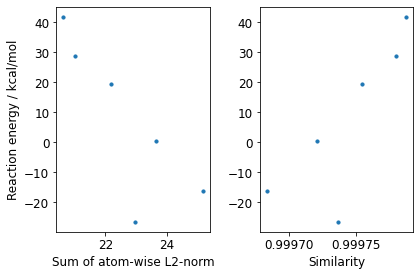

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(np.sqrt(no_duplicates["ObjValNoPen"]), no_duplicates["energies / kcal/mol"], s=10)
ax[0].set_xlabel("Sum of atom-wise L2-norm")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-no_duplicates["ObjValNoPen"]/(2*1000**2))
ax[1].scatter(x, no_duplicates["energies / kcal/mol"], s=10)
ax[1].set_xlabel("Similarity")

plt.tight_layout()
#plt.savefig("../figures/correlation-acm-local-8H2C.png", dpi=300)
plt.show()

In [90]:
len(no_duplicates)

244

In [59]:
# now remove duplicates, i.e. only one distance per energy 

In [93]:
slatm_out_sub

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,Excess Counts,diff,bool,energies / Ha,energies / kcal/mol
11,12,"[qm7_4944, qm7_4119]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",107359.0,157359.0,"[[(7, 1), (6, 2), (3, 7), (4, 8), (5, 9)], [(2...","[qm7_4119, qm7_4944]","[9.0, 4.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True,0.056954,35.738505
12,13,"[qm7_4944, qm7_4119]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",107359.0,157359.0,"[[(7, 1), (6, 2), (3, 7), (4, 8), (5, 9)], [(2...","[qm7_4119, qm7_4944]","[9.0, 4.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True,0.056954,35.738505
13,14,"[qm7_4944, qm7_4119]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",107359.0,157359.0,"[[(7, 1), (6, 2), (3, 7), (4, 8), (5, 9)], [(2...","[qm7_4119, qm7_4944]","[9.0, 4.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True,0.056954,35.738505
14,15,"[qm7_4944, qm7_4119]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",108487.0,158487.0,"[[(7, 1), (6, 2), (3, 7), (4, 8), (5, 9)], [(2...","[qm7_4119, qm7_4944]","[9.0, 4.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True,0.056954,35.738505
15,16,"[qm7_4944, qm7_4119]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",108487.0,158487.0,"[[(7, 1), (6, 2), (3, 7), (4, 8), (5, 9)], [(2...","[qm7_4119, qm7_4944]","[9.0, 4.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True,0.056954,35.738505
...,...,...,...,...,...,...,...,...,...,...,...,...
892,893,"[qm7_5458, qm7_4119]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",125757.0,175757.0,"[[(6, 2), (7, 6), (2, 7), (3, 8), (4, 9)], [(7...","[qm7_4119, qm7_5458]","[9.0, 4.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True,0.063797,40.032681
896,897,"[qm7_5455, qm7_5518]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",125767.0,175767.0,"[[(6, 2), (4, 3), (7, 6), (2, 7), (3, 8)], [(7...","[qm7_5455, qm7_5518]","[9.0, 4.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True,0.024864,15.601995
897,898,"[qm7_5455, qm7_5518]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",125767.0,175767.0,"[[(6, 2), (4, 3), (7, 6), (2, 7), (3, 8)], [(7...","[qm7_5455, qm7_5518]","[9.0, 4.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True,0.024864,15.601995
978,979,"[qm7_4139, qm7_5261]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",126290.0,176290.0,"[[(6, 3), (7, 4), (4, 5), (5, 6)], [(7, 1), (6...","[qm7_4139, qm7_5261]","[9.0, 4.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]",True,0.065553,41.134320


In [94]:
unique_energies = np.unique(slatm_out_sub["energies / Ha"])

In [95]:
unique_energies

array([0.01938476, 0.02092185, 0.02486374, 0.02579667, 0.02850746,
       0.03236576, 0.0389369 , 0.03920907, 0.04204634, 0.04239063,
       0.04328659, 0.04442821, 0.04550988, 0.04586534, 0.0483701 ,
       0.04930303, 0.04945177, 0.04989265, 0.0503847 , 0.05078861,
       0.05587212, 0.05695379, 0.06244326, 0.06271543, 0.06352493,
       0.0637971 , 0.0655527 , 0.06663437])

In [96]:
args = []
for energy in unique_energies: 
    matches = slatm_out_sub[slatm_out_sub["energies / Ha"] == energy]
    # find minimum 
    argmin = matches["ObjValNoPen"].idxmin()
    args.append(argmin)

In [97]:
no_duplicates = slatm_out_sub.loc[args]

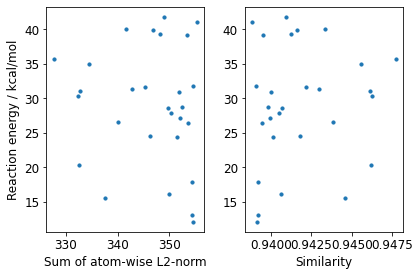

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(np.sqrt(no_duplicates["ObjValNoPen"]), no_duplicates["energies / kcal/mol"], s=10)
ax[0].set_xlabel("Sum of atom-wise L2-norm")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-no_duplicates["ObjValNoPen"]/(2*1000**2))
ax[1].scatter(x, no_duplicates["energies / kcal/mol"], s=10)
ax[1].set_xlabel("Similarity")

plt.tight_layout()
plt.savefig("../figures/correlation-slatm-local-onebalance.png", dpi=300)
plt.show()

In [80]:
len(no_duplicates)

28